In [1]:
import warnings
def warn(*arg, **kwarg):
    pass
warnings.warn = warn




In [2]:
!pip install numpy
!pip install pandas
!pip install matplotlib
import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import glob
import json
from IPython.display import Image




You should consider upgrading via the 'c:\users\mohammad sabber\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\mohammad sabber\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\users\mohammad sabber\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [3]:
!pip install py2neo
import py2neo
from py2neo import Graph



You should consider upgrading via the 'c:\users\mohammad sabber\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [4]:
!pip install jgraph
import jgraph as IGraph
from IPython.display import Image
from IPython.core.display import HTML 

You should consider upgrading via the 'c:\users\mohammad sabber\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [5]:
import numpy as np
import pandas as pd

# Other
import re
import string



In [6]:
# NLTK
!pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

You should consider upgrading via the 'c:\users\mohammad sabber\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [7]:
## Plot
!pip install plotly
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import matplotlib as plt

You should consider upgrading via the 'c:\users\mohammad sabber\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [8]:
root_path = 'C:/Users/Mohammad Sabber/Desktop/demo'
metadata_path = f'{root_path}/metadata.csv'



In [9]:
metadata_path

'C:/Users/Mohammad Sabber/Desktop/demo/metadata.csv'

In [10]:
meta_df = pd.read_csv(metadata_path, dtype={
    'pubmed_id': str,
    'Microsoft Academic Paper ID': str, 
    'doi': str,
})
meta_df.head(3)

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [11]:
meta_df.shape

(522159, 19)

In [12]:
all_json = glob.glob(f'{root_path}/**/*.json', recursive=True)
len(all_json)

13000

In [13]:
class FileReader:
    def __init__(self, file_path):
        with open(file_path) as file:
            content = json.load(file)
            self.paper_id = content['paper_id']
            self.abstract = []
            self.body_text = []
            self.title = content['metadata']['title']
            # Abstract
            for entry in content['abstract']:
                self.abstract.append(entry['text'])
            # Body text
            for entry in content['body_text']:
                self.body_text.append(entry['text'])
            self.abstract = '\n'.join(self.abstract)
            self.body_text = '\n'.join(self.body_text)

    def __repr__(self):
        return f'{self.paper_id}: {self.title}: {self.abstract[:200]}... {self.body_text[:200]}...'
first_row = FileReader(all_json[0])
print(first_row)

0007f972812bb45abbe5b0edf8db5359d49c23eb: The role of nicotinic receptors in SARS-CoV-2 receptor ACE2 expression in intestinal epithelia: Background: Recent evidence demonstrated that severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) propagates in intestinal epithelial cells expressing Angiotensin-Converting Enzyme 2 (ACE2), ... Coronavirus disease 2019 , caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2), is characterized by a vast release of cytokines. Aggravated by following sepsis, this was established...


In [14]:
dict_ = {'paper_id': [], 'title': [], 'abstract': [], 'body_text': []}
for idx, entry in enumerate(all_json):
    if idx % (len(all_json) // 10) == 0:
        print(f'Processing index: {idx} of {len(all_json)}')
    content = FileReader(entry)
    dict_['paper_id'].append(content.paper_id)
    dict_['title'].append(content.title)
    dict_['abstract'].append(content.abstract)
    dict_['body_text'].append(content.body_text)
df_covid = pd.DataFrame(dict_, columns=['paper_id', 'title', 'abstract', 'body_text'])

Processing index: 0 of 13000
Processing index: 1300 of 13000
Processing index: 2600 of 13000
Processing index: 3900 of 13000
Processing index: 5200 of 13000
Processing index: 6500 of 13000
Processing index: 7800 of 13000
Processing index: 9100 of 13000
Processing index: 10400 of 13000
Processing index: 11700 of 13000


In [15]:
df_covid.head()
df_covid.shape
df_covid.drop_duplicates(['title'], inplace=True)
df_covid.drop_duplicates(['abstract'], inplace=True)
df_covid.drop_duplicates(['body_text'], inplace=True)
print(f'Title: {df_covid["title"].nunique()}, Abstract: {df_covid["abstract"].nunique()}, Body: {df_covid["body_text"].nunique()}')
def lower_case(input_str):
    input_str = input_str.lower()
    return input_str

df_covid['title'] = df_covid['title'].apply(lambda x: lower_case(x))
df_covid['body_text'] = df_covid['body_text'].apply(lambda x: lower_case(x))
df_covid['abstract'] = df_covid['abstract'].apply(lambda x: lower_case(x))

Title: 8572, Abstract: 8572, Body: 8572


In [16]:
df_covid.head()
df_covid.shape

(8572, 4)

In [17]:

df_covid.drop_duplicates(['title'], inplace=True)
df_covid.drop_duplicates(['abstract'], inplace=True)
df_covid.drop_duplicates(['body_text'], inplace=True)

In [18]:
print(f'Title: {df_covid["title"].nunique()}, Abstract: {df_covid["abstract"].nunique()}, Body: {df_covid["body_text"].nunique()}')

Title: 8564, Abstract: 8564, Body: 8564


In [19]:
def lower_case(input_str):
    input_str = input_str.lower()
    return input_str

df_covid['title'] = df_covid['title'].apply(lambda x: lower_case(x))
df_covid['body_text'] = df_covid['body_text'].apply(lambda x: lower_case(x))
df_covid['abstract'] = df_covid['abstract'].apply(lambda x: lower_case(x))

In [20]:
def regexReplcae(text):
    text = re.sub(r"\"", " ", text)
    text = re.sub(r"(\"?\')(\w)", " \2", text)
    text = re.sub(r"\?", " .", text)
    text = re.sub(r",", "", text)
    text = re.sub(r"\.\s?", " SEP.SEP ", text)
    text = re.sub(r"!", ".", text)
    text = re.sub(r":", "", text)
    text = re.sub(r"\s?\;\s?", "", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\(", "", text)
    text = re.sub(r"\)", "", text)
    text = re.sub(r"&", " ", text)
    text = re.sub(r"([A-z])\-([A-z])", r"\1 \2", text)
    text = re.sub(r"viruses", "virus", text)
    text = re.sub(r"proteins", "protein", text)
    text = re.sub(r"genes", "gene", text)
    text = re.sub(r"pathogens", "pathogen", text)
    text = re.sub(r"cells", "cell", text)
    text = re.sub(r"drugs", "drug", text)
    text = re.sub(r"vaccines", "vaccine", text)
    text = re.sub(r"vaccination", "vaccine", text)
    text = re.sub(r"genomes", "gene", text)
    text = re.sub(r"genotypes", "genotype", text)
    text = re.sub(r"diseases", "disease", text)
    text = re.sub(r"pathogenesis", "pathogen", text)
    text = re.sub(r"pathogeneis", "pathogen", text)
    text = re.sub(r"pathogenic", "pathogen", text)
    text = re.sub(r"infections", "infection", text)
    text = re.sub(r"infected", "infection", text)
    text = re.sub(r"antibodies", "antibody", text)
    text = re.sub(r"zikv", "zikavirus", text)
    text = re.sub(r"zika", "zikavirus", text)
    text = re.sub(r"bats", "bat", text)
    text = re.sub(r"dogs", "dog", text)
    text = re.sub(r"cats", "cat", text)
    text = re.sub(r"sequences", "sequence", text)
    text = re.sub(r"experiments", "experiment", text)
    text = re.sub(r"sequencing", "sequence", text)
    text = re.sub(r"author\s?", "", text)
    text = re.sub(r"corresponding\s?", "", text)
    text = re.sub(r"inhibited", "inhibit", text)
    text = re.sub(r"inhibitor", "inhibit", text)
    text = re.sub(r"adults", "adult", text)   
    text = re.sub(r"interactions", "interaction", text)
    text = re.sub(r"[^\s@]+@[^\s@]+\.[^\s@]{2,}", " ", text)
    return text

In [21]:

all_text = ' '.join(df_covid['abstract'])
all_text = regexReplcae(all_text)

In [22]:
import nltk
nltk.download('punkt')
allWords = nltk.tokenize.word_tokenize(all_text)
allWordDist = nltk.FreqDist(w.lower() for w in allWords)

[nltk_data] Downloading package punkt to C:\Users\Mohammad
[nltk_data]     Sabber\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [23]:
freq_df = pd.DataFrame(allWordDist.items()).rename(columns = {0:'word', 1: 'count'})
freq_df.sort_values(by = ['count'], ascending = False, inplace= True)

In [24]:
freq_df[freq_df['count'] <= 1].count()

word     38137
count    38137
dtype: int64

In [25]:
freq_df.shape

(73889, 2)

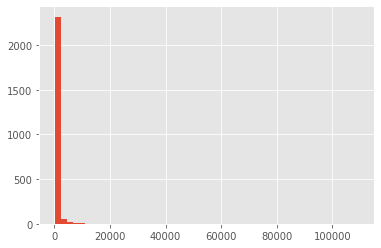

In [26]:
import matplotlib.pyplot as plt
plt.hist(freq_df[freq_df['count'] >100]['count'], bins = 50, density=False);

In [27]:
print(f'Stop words from histogram: {len(list(freq_df[freq_df["count"]  >= 100]["word"]))}')

Stop words from histogram: 2433


In [28]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from stopwords_list import stopwords_list
updated_stopwords = list(set(stopwords.words("english")).union(set(stopwords_list)))
print(f'Total number of stopwords: {len(updated_stopwords)}')

[nltk_data] Downloading package stopwords to C:\Users\Mohammad
[nltk_data]     Sabber\AppData\Roaming\nltk_data...


Total number of stopwords: 2796


[nltk_data]   Package stopwords is already up-to-date!


In [29]:
def clean_text(text):
    text = regexReplcae(text)
    text = text.lower().split()
    text = [w for w in text if w not in updated_stopwords  and len(w) > 2]
    aa = nltk.pos_tag(text)
    text = [pair[0] for pair in aa if pair[1] == 'NNS' or pair[1] == 'NN' or pair[1] == 'NNP' or pair[1] == 'NNPS' or  pair[1] == 'CC' or pair[1] == 'RB' or pair[1] == 'sep.sep']
    text = " ".join(text)
    text = re.sub(r"\s?sep\.sep\s?", ". ", text)
    
    if text is None:
        return na
    else:
        return text

In [30]:
import nltk

df_covid['processed_title'] = df_covid['title'].map(lambda x: clean_text(x))
df_covid['processed_abstract'] = df_covid['abstract'].map(lambda x: clean_text(x))

In [31]:
df_covid.head(5)

,paper_id,title,abstract,body_text,processed_title,processed_abstract
0,0007f972812bb45abbe5b0edf8db5359d49c23eb,the role of nicotinic receptors in sars-cov-2 ...,background: recent evidence demonstrated that ...,"coronavirus disease 2019 , caused by severe ac...",receptors receptor epithelia,respiratory syndrome coronavirus propagates ce...
1,0008c57de475138d903f2cca7003cf1e1ad93cf4,the effect of gramicidin inclusions on the loc...,we study the local effect of the antimicrobial...,the effect on the cell membrane of inclusions ...,gramicidin inclusions membrane,peptide gramicidin bilayers surfactants resona...
2,006a64c63751b895299d7a54bb131e6388924945,comment on: underwater-seal evacuation of surg...,,we read with great interest the published pape...,comment evacuation smoke feasibility simple te...,
4,006bce86ab0dd9c1f16fc2a83a111735c97d945b,contamination inside ct gantry in the sars-cov...,we investigated whether the internal gantry co...,many computed tomography (ct) scanners are equ...,contamination gantry sars era,gantry tomography scanner contain respiratory ...
5,006be5ba67759a525ae8e211f43bd8e4429a64f0,human astroviruses: in silico analysis of the ...,human astrovirus (hastv) constitutes a major c...,human astroviruses (hastvs) are a major cause ...,astrovirus silico protein,astrovirus hastv gastroenteritis. astrovirues ...


In [32]:
graph = Graph("bolt://localhost:7687", auth = ("neo4j", 'SABBIR123'))

In [33]:
CREATE_MODEL = '''
CREATE 
  (`0` :Word ) ,
  (`1` :Word ) ,
  (`0`)-[:`NEXT_WORD` ]->(`1`)
'''

DELETE_EXISTING_DATA = '''MATCH (n) DETACH DELETE n'''
CREATE_WORD_CONSTRAINT = '''CREATE CONSTRAINT ON (W:Word) ASSERT W.name is unique;'''

INSERT_DATA = '''
WITH split($sentence, " ") as words
unwind range(0,size(words)-2) as idx

MERGE (w1:Word {name: words[idx]})
  ON CREATE SET w1.count = 1 ON MATCH SET w1.count =  1 + w1.count

MERGE (w2:Word {name: words[idx+1]})
  ON CREATE SET w2.count = 1 ON MATCH SET w2.count =  1 + (case when idx = size(words)-2 then 1 else 0 end)

MERGE (w1)-[NW: NEXT_WORD]->(w2)
  ON CREATE SET NW.count = 1 ON MATCH SET NW.count = 1 + NW.count
'''

In [34]:
graph.delete_all()
graph.run(DELETE_EXISTING_DATA)
graph.run(CREATE_MODEL)
graph.run(CREATE_WORD_CONSTRAINT)

(No data)

In [35]:
for lines in df_covid['processed_abstract']:
    aa = lines.split('.')
    for sentence in aa:
        if sentence != "":
            graph.run(INSERT_DATA, parameters = {'sentence': sentence.strip()})

In [36]:
DELETE_EMPTY_NODE = '''
MATCH (n { name:"" })
DETACH DELETE n
'''
graph.run(DELETE_EMPTY_NODE)

(No data)